In [ ]:
pip install qiskit[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 5.3 MB/s 
     |████████████████████████████████| 18.0 MB 362 kB/s 
     |████████████████████████████████| 240 kB 51.5 MB/s 
     |████████████████████████████████| 162 kB 48.9 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 112 kB 48.2 MB/s 
     |████████████████████████████████| 37.5 MB 50 kB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 943 kB 44.3 MB/s 
     |████████████████████████████████| 1.6 MB 49.9 MB/s 
     |████████████████████████████████| 1.6 MB 45.2 MB/s 
     |████████████████████████████████| 4.0 MB 25.2 MB/s 
     |████████████████████████████████| 112 kB 49.0 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.2-py3-none-any.whl size=12109 sha256=eda6e70a2a2

In [ ]:
from qiskit import QuantumCircuit

In [ ]:
from qiskit import QuantumCircuit, assemble , Aer
from qiskit.visualization import plot_histogram


In [ ]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
#qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)


qc_ha.barrier()
# extract outputs
qc_ha.measure_all()

qc_ha.draw()

░                 ░  ░ ┌─┐         
   q_0: ──────░───■─────────■───░──░─┤M├─────────
        ┌───┐ ░   │         │   ░  ░ └╥┘┌─┐      
   q_1: ┤ X ├─░───┼────■────■───░──░──╫─┤M├──────
        └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░  ░  ║ └╥┘┌─┐   
   q_2: ──────░─┤ X ├┤ X ├──┼───░──░──╫──╫─┤M├───
              ░ └───┘└───┘┌─┴─┐ ░  ░  ║  ║ └╥┘┌─┐
   q_3: ──────░───────────┤ X ├─░──░──╫──╫──╫─┤M├
              ░           └───┘ ░  ░  ║  ║  ║ └╥┘
   c: 2/══════════════════════════════╬══╬══╬══╬═
                                      ║  ║  ║  ║ 
meas: 4/══════════════════════════════╩══╩══╩══╩═
                                      0  1  2  3

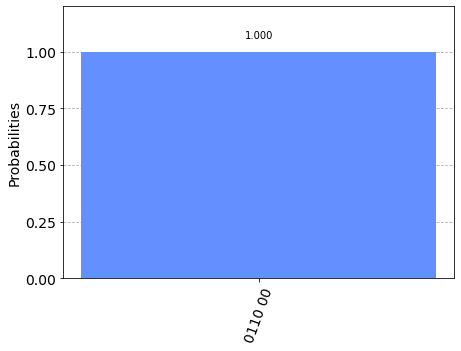

In [ ]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc_ha)

counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [ ]:
q = QuantumRegister(5,'q')
c = ClassicalRegister(2,'c')

circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.cx(q[0],q[3])
circuit.cx(q[1],q[3])
circuit.cx(q[2],q[3])
circuit.ccx(q[0],q[1],q[4])
circuit.ccx(q[0],q[2],q[4])
circuit.ccx(q[1],q[2],q[4])

circuit.measure(q[3],c[0])
circuit.measure(q[4],c[1])

NameError: ignored